# Student performance in exams
#### Marks secured by the students in college

## Aim
#### To understand the influence of various factors like economic, personal and social on the students performance 

## Inferences would be : 
#### 1. How to imporve the students performance in each test ?
#### 2. What are the major factors influencing the test scores ?
#### 3. Effectiveness of test preparation course?
#### 4. Other inferences 


In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv(r"C:\Users\Guestuser\Downloads\StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [2]:
print (df.shape)

(1000, 8)


In [3]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### Let us explore the data

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="math score", data = df, palette="muted")
plt.show()

<Figure size 640x480 with 1 Axes>

In [5]:
df['Math_PassStatus'] = np.where(df['math score']<40, 'F', 'P')
df['Reading_PassStatus'] = np.where(df['reading score']<40, 'F', 'P')
df['Writing_PassStatus'] = np.where(df['writing score']<40, 'F', 'P')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Math_PassStatus,Reading_PassStatus,Writing_PassStatus
0,female,group B,bachelor's degree,standard,none,72,72,74,P,P,P
1,female,group C,some college,standard,completed,69,90,88,P,P,P
2,female,group B,master's degree,standard,none,90,95,93,P,P,P
3,male,group A,associate's degree,free/reduced,none,47,57,44,P,P,P
4,male,group C,some college,standard,none,76,78,75,P,P,P


In [6]:
df.Math_PassStatus.value_counts()

P    960
F     40
Name: Math_PassStatus, dtype: int64

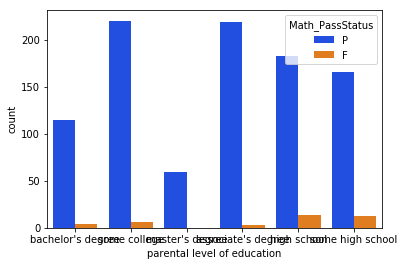

In [7]:
sns.countplot(x='parental level of education', data = df, hue='Math_PassStatus', palette='bright')
plt.show()

In [8]:
df.Reading_PassStatus.value_counts()

P    974
F     26
Name: Reading_PassStatus, dtype: int64

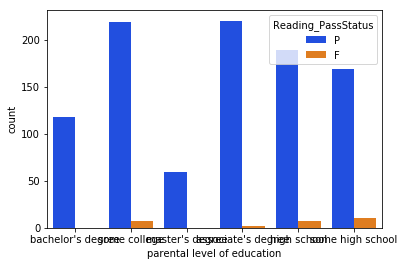

In [9]:
sns.countplot(x='parental level of education', data = df, hue='Reading_PassStatus', palette='bright')
plt.show()

In [10]:
df.Writing_PassStatus.value_counts()

P    968
F     32
Name: Writing_PassStatus, dtype: int64

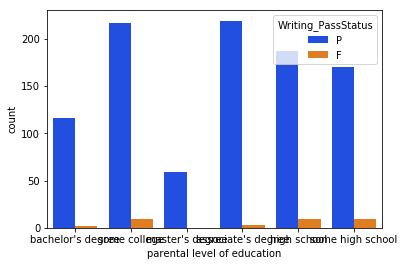

In [11]:
sns.countplot(x='parental level of education', data = df, hue='Writing_PassStatus', palette='bright')
plt.show()